In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import json
import os

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
os.chdir('/content/drive/MyDrive/Food KG recommendation/healthy-food-subs')

In [7]:
df = pd.read_excel('data/input/ABBREV.xlsx',sheet_name='ABBREV')

In [8]:
df.head()

,NDB_No,Shrt_Desc,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),Sugar_Tot_(g),Calcium_(mg),Iron_(mg),Magnesium_(mg),Phosphorus_(mg),Potassium_(mg),Sodium_(mg),Zinc_(mg),Copper_mg),Manganese_(mg),Selenium_(µg),Vit_C_(mg),Thiamin_(mg),Riboflavin_(mg),Niacin_(mg),Panto_Acid_mg),Vit_B6_(mg),Folate_Tot_(µg),Folic_Acid_(µg),Food_Folate_(µg),Folate_DFE_(µg),Choline_Tot_ (mg),Vit_B12_(µg),Vit_A_IU,Vit_A_RAE,Retinol_(µg),Alpha_Carot_(µg),Beta_Carot_(µg),Beta_Crypt_(µg),Lycopene_(µg),Lut+Zea_ (µg),Vit_E_(mg),Vit_D_µg,Vit_D_IU,Vit_K_(µg),FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg),GmWt_1,GmWt_Desc1,GmWt_2,GmWt_Desc2,Refuse_Pct
0,1001,"BUTTER,WITH SALT",15.87,717,0.85,81.11,2.11,0.06,0.0,0.06,24.0,0.02,2.0,24.0,24.0,643.0,0.09,0.000,0.000,1.0,0.0,0.005,0.034,0.042,0.110,0.003,3.0,0.0,3.0,3.0,18.8,0.17,2499.0,684.0,671.0,0.0,158.0,0.0,0.0,0.0,2.32,1.5,60.0,7.0,51.368,21.021,3.043,215.0,5.0,"1 pat, (1"" sq, 1/3"" high)",14.2,1 tbsp,0.0
1,1002,"BUTTER,WHIPPED,WITH SALT",15.87,717,0.85,81.11,2.11,0.06,0.0,0.06,24.0,0.16,2.0,23.0,26.0,659.0,0.05,0.016,0.004,1.0,0.0,0.005,0.034,0.042,0.110,0.003,3.0,0.0,3.0,3.0,18.8,0.13,2499.0,684.0,671.0,0.0,158.0,0.0,0.0,0.0,2.32,1.5,60.0,7.0,50.489,23.426,3.012,219.0,3.0,"1 pat, (1"" sq, 1/3"" high)",9.4,1 tbsp,0.0
2,1003,"BUTTER OIL,ANHYDROUS",0.24,876,0.28,99.48,0.00,0.00,0.0,0.00,4.0,0.00,0.0,3.0,5.0,2.0,0.01,0.001,0.000,0.0,0.0,0.001,0.005,0.003,0.010,0.001,0.0,0.0,0.0,0.0,22.3,0.01,3069.0,840.0,824.0,0.0,193.0,0.0,0.0,0.0,2.80,1.8,73.0,8.6,61.924,28.732,3.694,256.0,12.0,1 tbsp,205.0,1 cup,0.0
3,1004,"CHEESE,BLUE",42.41,353,21.40,28.74,5.11,2.34,0.0,0.50,528.0,0.31,23.0,387.0,256.0,1146.0,2.66,0.040,0.009,14.5,0.0,0.029,0.382,1.016,1.729,0.166,36.0,0.0,36.0,36.0,15.4,1.22,721.0,198.0,192.0,0.0,74.0,0.0,0.0,0.0,0.25,0.5,21.0,2.4,18.669,7.778,0.800,75.0,28.0,1 oz,17.0,1 cubic inch,0.0
4,1005,"CHEESE,BRICK",41.11,371,23.24,29.68,3.18,2.79,0.0,0.51,674.0,0.43,24.0,451.0,136.0,560.0,2.60,0.024,0.012,14.5,0.0,0.014,0.351,0.118,0.288,0.065,20.0,0.0,20.0,20.0,15.4,1.26,1080.0,292.0,286.0,0.0,76.0,0.0,0.0,0.0,0.26,0.5,22.0,2.5,18.764,8.598,0.784,94.0,132.0,"1 cup, diced",113.0,"1 cup, shredded",0.0


In [9]:
df.NDB_No= 'http://idea.rpi.edu/heals/kb/usda#'+df.NDB_No.astype(str).str.rjust(5,'0')

In [10]:
df.head()

,NDB_No,Shrt_Desc,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),Sugar_Tot_(g),Calcium_(mg),Iron_(mg),Magnesium_(mg),Phosphorus_(mg),Potassium_(mg),Sodium_(mg),Zinc_(mg),Copper_mg),Manganese_(mg),Selenium_(µg),Vit_C_(mg),Thiamin_(mg),Riboflavin_(mg),Niacin_(mg),Panto_Acid_mg),Vit_B6_(mg),Folate_Tot_(µg),Folic_Acid_(µg),Food_Folate_(µg),Folate_DFE_(µg),Choline_Tot_ (mg),Vit_B12_(µg),Vit_A_IU,Vit_A_RAE,Retinol_(µg),Alpha_Carot_(µg),Beta_Carot_(µg),Beta_Crypt_(µg),Lycopene_(µg),Lut+Zea_ (µg),Vit_E_(mg),Vit_D_µg,Vit_D_IU,Vit_K_(µg),FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg),GmWt_1,GmWt_Desc1,GmWt_2,GmWt_Desc2,Refuse_Pct
0,http://idea.rpi.edu/heals/kb/usda#01001,"BUTTER,WITH SALT",15.87,717,0.85,81.11,2.11,0.06,0.0,0.06,24.0,0.02,2.0,24.0,24.0,643.0,0.09,0.000,0.000,1.0,0.0,0.005,0.034,0.042,0.110,0.003,3.0,0.0,3.0,3.0,18.8,0.17,2499.0,684.0,671.0,0.0,158.0,0.0,0.0,0.0,2.32,1.5,60.0,7.0,51.368,21.021,3.043,215.0,5.0,"1 pat, (1"" sq, 1/3"" high)",14.2,1 tbsp,0.0
1,http://idea.rpi.edu/heals/kb/usda#01002,"BUTTER,WHIPPED,WITH SALT",15.87,717,0.85,81.11,2.11,0.06,0.0,0.06,24.0,0.16,2.0,23.0,26.0,659.0,0.05,0.016,0.004,1.0,0.0,0.005,0.034,0.042,0.110,0.003,3.0,0.0,3.0,3.0,18.8,0.13,2499.0,684.0,671.0,0.0,158.0,0.0,0.0,0.0,2.32,1.5,60.0,7.0,50.489,23.426,3.012,219.0,3.0,"1 pat, (1"" sq, 1/3"" high)",9.4,1 tbsp,0.0
2,http://idea.rpi.edu/heals/kb/usda#01003,"BUTTER OIL,ANHYDROUS",0.24,876,0.28,99.48,0.00,0.00,0.0,0.00,4.0,0.00,0.0,3.0,5.0,2.0,0.01,0.001,0.000,0.0,0.0,0.001,0.005,0.003,0.010,0.001,0.0,0.0,0.0,0.0,22.3,0.01,3069.0,840.0,824.0,0.0,193.0,0.0,0.0,0.0,2.80,1.8,73.0,8.6,61.924,28.732,3.694,256.0,12.0,1 tbsp,205.0,1 cup,0.0
3,http://idea.rpi.edu/heals/kb/usda#01004,"CHEESE,BLUE",42.41,353,21.40,28.74,5.11,2.34,0.0,0.50,528.0,0.31,23.0,387.0,256.0,1146.0,2.66,0.040,0.009,14.5,0.0,0.029,0.382,1.016,1.729,0.166,36.0,0.0,36.0,36.0,15.4,1.22,721.0,198.0,192.0,0.0,74.0,0.0,0.0,0.0,0.25,0.5,21.0,2.4,18.669,7.778,0.800,75.0,28.0,1 oz,17.0,1 cubic inch,0.0
4,http://idea.rpi.edu/heals/kb/usda#01005,"CHEESE,BRICK",41.11,371,23.24,29.68,3.18,2.79,0.0,0.51,674.0,0.43,24.0,451.0,136.0,560.0,2.60,0.024,0.012,14.5,0.0,0.014,0.351,0.118,0.288,0.065,20.0,0.0,20.0,20.0,15.4,1.26,1080.0,292.0,286.0,0.0,76.0,0.0,0.0,0.0,0.26,0.5,22.0,2.5,18.764,8.598,0.784,94.0,132.0,"1 cup, diced",113.0,"1 cup, shredded",0.0


In [11]:
len(df)

8618

In [12]:
def scoreEnergy(energy):
  if energy <= 335:
    return 0
  elif energy > 3350:
    return 10
  elif energy > 3015:
    return 9
  elif energy > 2680:
    return 8
  elif energy > 2345:
    return 7
  elif energy > 2010:
    return 6
  elif energy > 1675:
    return 5
  elif energy > 1340:
    return 4
  elif energy > 1005:
    return 3
  elif energy > 670:
    return 2
  elif energy > 335:
    return 1

def scoreSugar(sugar):
  if sugar <= 4.5:
    return 0
  elif sugar > 45:
    return 10
  elif sugar > 40:
    return 9
  elif sugar > 36:
    return 8
  elif sugar > 31:
    return 7
  elif sugar > 27:
    return 6
  elif sugar > 22.5:
    return 5
  elif sugar > 18:
    return 4
  elif sugar > 13.5:
    return 3
  elif sugar > 9:
    return 2
  elif sugar > 4.5:
    return 1

def scoreSaturatedFattyAcid(saturatedFattyAcids):
  if saturatedFattyAcids <= 1:
    return 0
  elif saturatedFattyAcids > 10:
    return 10
  elif saturatedFattyAcids > 9:
    return 9
  elif saturatedFattyAcids > 8:
    return 8
  elif saturatedFattyAcids > 7:
    return 7
  elif saturatedFattyAcids > 6:
    return 6
  elif saturatedFattyAcids > 5:
    return 5
  elif saturatedFattyAcids > 4:
    return 4
  elif saturatedFattyAcids > 3:
    return 3
  elif saturatedFattyAcids > 2:
    return 2
  elif saturatedFattyAcids > 1:
    return 1

def scoreSodium(sodium):
  if sodium <= 90:
    return 0
  elif sodium > 900:
    return 10
  elif sodium > 810:
    return 9
  elif sodium > 720:
    return 8
  elif sodium > 630:
    return 7
  elif sodium > 540:
    return 6
  elif sodium > 450:
    return 5
  elif sodium > 360:
    return 4
  elif sodium > 270:
    return 3
  elif sodium > 180:
    return 2
  elif sodium > 90:
    return 1

def scoreFiber(fibers):
  if fibers <= 0.9:
    return 0
  elif fibers > 4.7:
    return -5
  elif fibers > 3.7:
    return -4
  elif fibers > 2.8:
    return -3
  elif fibers > 1.9:
    return -2
  elif fibers > 0.9:
    return -1

def scoreProtein(proteins):
  if proteins <= 1.6:
    return 0
  elif proteins > 8:
    return -5
  elif proteins > 6.4:
    return -4
  elif proteins > 4.8:
    return -3
  elif proteins > 3.2:
    return -2
  elif proteins > 1.6:
    return -1

def nutriScoreFoods(nutri_score):
  if nutri_score >= -15 and nutri_score <= -1:
    return 'a'
  elif nutri_score >= 0 and nutri_score <= 2:
    return 'b'
  elif nutri_score >= 3 and nutri_score <= 10:
    return 'c'
  elif nutri_score >= 11 and nutri_score <= 18:
    return 'd'
  elif nutri_score >= 19 and nutri_score <= 40:
    return 'e'

In [25]:
def get_nutri_value(row):
    #print (row)
    energy = float(row['Energ_Kcal'])
    sugar = float(row['Sugar_Tot_(g)'])
    fat_sat = float(row['FA_Sat_(g)'])
    sodium = float(row['Sodium_(mg)'])
    fiber = float(row['Fiber_TD_(g)'])
    protein = float(row['Protein_(g)'])
    total = 0
    #print (sugar, type(sugar))
    if not np.isnan(energy):
        total += scoreEnergy(energy*4.184)
    if not np.isnan(sugar):
        total += scoreSugar(sugar)
    if not np.isnan(fat_sat):
        total += scoreSaturatedFattyAcid(fat_sat)
    if not np.isnan(sodium):
        total += scoreSodium(sodium)
    if not np.isnan(fiber):
        total += scoreFiber(fiber)
    if not np.isnan(protein):
        total += scoreProtein(protein)
    return total

In [26]:
df['nutri_values']= df.apply(get_nutri_value, axis='columns')
#df['nutri_values'] = nutri_values

In [27]:
df['nutri_scores']= df['nutri_values'].apply(nutriScoreFoods)
# nutri_scores = []
# for i, row in df.iterrows():
#     nutri_scores.append(nutriScoreFoods(df['nutri_values'].iloc[i]))
# df['nutri_scores'] = nutri_scores

In [37]:
df.sample(5)

,NDB_No,Shrt_Desc,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),Sugar_Tot_(g),Calcium_(mg),Iron_(mg),Magnesium_(mg),Phosphorus_(mg),Potassium_(mg),Sodium_(mg),Zinc_(mg),Copper_mg),Manganese_(mg),Selenium_(µg),Vit_C_(mg),Thiamin_(mg),Riboflavin_(mg),Niacin_(mg),Panto_Acid_mg),Vit_B6_(mg),Folate_Tot_(µg),Folic_Acid_(µg),Food_Folate_(µg),Folate_DFE_(µg),Choline_Tot_ (mg),Vit_B12_(µg),Vit_A_IU,Vit_A_RAE,Retinol_(µg),Alpha_Carot_(µg),Beta_Carot_(µg),Beta_Crypt_(µg),Lycopene_(µg),Lut+Zea_ (µg),Vit_E_(mg),Vit_D_µg,Vit_D_IU,Vit_K_(µg),FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg),GmWt_1,GmWt_Desc1,GmWt_2,GmWt_Desc2,Refuse_Pct,nutri_values,nutri_scores
2012,http://idea.rpi.edu/heals/kb/usda#08476,"CEREALS RTE,MALT-O-MEAL,HONEY BUZZERS",1.88,395,6.30,2.14,2.05,87.60,2.9,37.40,14.0,7.86,31.0,101.0,120.0,759.0,7.43,0.167,0.603,10.8,1.9,1.870,2.040,21.700,0.067,2.150,1059.0,1040.0,19.0,1787.0,NaN,7.30,3600.0,1081.0,1081.0,0.0,0.0,0.0,0.0,0.0,0.21,4.3,171.0,0.7,0.650,0.550,0.650,1.0,29.0,1.333 cup,NaN,NaN,0.0,14,d
6628,http://idea.rpi.edu/heals/kb/usda#21035,"FAST FOODS,CHICK,BREADED&FRIED,DK MEAT (DRUMST...",48.99,291,20.32,18.04,2.05,10.61,NaN,NaN,24.0,1.08,25.0,162.0,301.0,510.0,2.19,0.080,0.086,23.7,0.0,0.090,0.290,4.870,1.660,0.220,17.0,11.0,6.0,25.0,NaN,0.56,150.0,45.0,45.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.763,7.385,4.272,112.0,148.0,2 pieces,NaN,NaN,23.0,7,c
2764,http://idea.rpi.edu/heals/kb/usda#10899,"PORK,CURED,HAM,SLICE,BONE-IN,LN,HTD,PAN-BROIL",65.33,148,27.18,4.09,3.17,0.74,0.0,0.74,15.0,1.42,25.0,296.0,427.0,870.0,3.04,0.426,0.022,25.3,0.0,0.575,0.317,7.767,0.758,0.540,2.0,0.0,2.0,2.0,112.9,0.66,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.30,1.1,44.0,0.0,1.253,1.613,0.644,73.0,85.0,"1 serving, (3 oz)",366.0,1 slice,14.0,6,c
3928,http://idea.rpi.edu/heals/kb/usda#13459,"BEEF,SHRT LOIN,PRTRHS STK,LN & FAT,0"" FAT,ALL ...",54.66,276,23.96,19.27,1.17,0.00,0.0,0.00,7.0,2.94,22.0,193.0,299.0,65.0,4.56,0.130,0.015,19.6,0.0,0.099,0.228,4.210,0.314,0.365,7.0,0.0,7.0,7.0,91.3,2.18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.18,NaN,NaN,NaN,7.271,8.650,0.690,67.0,85.0,"3 oz, ( 1 serving )",453.6,1 lb,21.0,5,c
7445,http://idea.rpi.edu/heals/kb/usda#23412,"BEEF,NZ,IMP,FLAT,LN,CKD,BRSD",56.39,226,33.22,10.30,1.06,0.00,0.0,0.00,6.0,3.23,18.0,159.0,172.0,30.0,4.54,0.190,0.016,2.0,0.0,0.024,0.192,2.292,0.150,0.171,NaN,NaN,NaN,NaN,NaN,1.85,49.0,15.0,15.0,0.0,0.0,0.0,0.0,0.0,1.16,0.0,0.0,NaN,3.117,3.761,0.517,94.0,85.0,3 oz,NaN,NaN,5.0,0,b


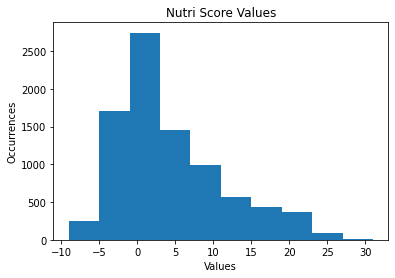

In [29]:
plt.hist(list(df['nutri_values']))
plt.title('Nutri Score Values')
plt.xlabel('Values')
plt.ylabel('Occurrences')
plt.show()

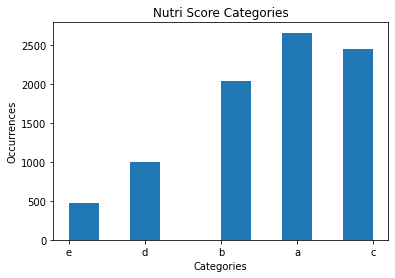

In [30]:
plt.hist(list(df['nutri_scores']))
plt.title('Nutri Score Categories')
plt.xlabel('Categories')
plt.ylabel('Occurrences')
plt.show()

In [31]:
len(df)

8618

In [32]:
df.head()

,NDB_No,Shrt_Desc,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),Sugar_Tot_(g),Calcium_(mg),Iron_(mg),Magnesium_(mg),Phosphorus_(mg),Potassium_(mg),Sodium_(mg),Zinc_(mg),Copper_mg),Manganese_(mg),Selenium_(µg),Vit_C_(mg),Thiamin_(mg),Riboflavin_(mg),Niacin_(mg),Panto_Acid_mg),Vit_B6_(mg),Folate_Tot_(µg),Folic_Acid_(µg),Food_Folate_(µg),Folate_DFE_(µg),Choline_Tot_ (mg),Vit_B12_(µg),Vit_A_IU,Vit_A_RAE,Retinol_(µg),Alpha_Carot_(µg),Beta_Carot_(µg),Beta_Crypt_(µg),Lycopene_(µg),Lut+Zea_ (µg),Vit_E_(mg),Vit_D_µg,Vit_D_IU,Vit_K_(µg),FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg),GmWt_1,GmWt_Desc1,GmWt_2,GmWt_Desc2,Refuse_Pct,nutri_values,nutri_scores
0,http://idea.rpi.edu/heals/kb/usda#01001,"BUTTER,WITH SALT",15.87,717,0.85,81.11,2.11,0.06,0.0,0.06,24.0,0.02,2.0,24.0,24.0,643.0,0.09,0.000,0.000,1.0,0.0,0.005,0.034,0.042,0.110,0.003,3.0,0.0,3.0,3.0,18.8,0.17,2499.0,684.0,671.0,0.0,158.0,0.0,0.0,0.0,2.32,1.5,60.0,7.0,51.368,21.021,3.043,215.0,5.0,"1 pat, (1"" sq, 1/3"" high)",14.2,1 tbsp,0.0,25,e
1,http://idea.rpi.edu/heals/kb/usda#01002,"BUTTER,WHIPPED,WITH SALT",15.87,717,0.85,81.11,2.11,0.06,0.0,0.06,24.0,0.16,2.0,23.0,26.0,659.0,0.05,0.016,0.004,1.0,0.0,0.005,0.034,0.042,0.110,0.003,3.0,0.0,3.0,3.0,18.8,0.13,2499.0,684.0,671.0,0.0,158.0,0.0,0.0,0.0,2.32,1.5,60.0,7.0,50.489,23.426,3.012,219.0,3.0,"1 pat, (1"" sq, 1/3"" high)",9.4,1 tbsp,0.0,25,e
2,http://idea.rpi.edu/heals/kb/usda#01003,"BUTTER OIL,ANHYDROUS",0.24,876,0.28,99.48,0.00,0.00,0.0,0.00,4.0,0.00,0.0,3.0,5.0,2.0,0.01,0.001,0.000,0.0,0.0,0.001,0.005,0.003,0.010,0.001,0.0,0.0,0.0,0.0,22.3,0.01,3069.0,840.0,824.0,0.0,193.0,0.0,0.0,0.0,2.80,1.8,73.0,8.6,61.924,28.732,3.694,256.0,12.0,1 tbsp,205.0,1 cup,0.0,20,e
3,http://idea.rpi.edu/heals/kb/usda#01004,"CHEESE,BLUE",42.41,353,21.40,28.74,5.11,2.34,0.0,0.50,528.0,0.31,23.0,387.0,256.0,1146.0,2.66,0.040,0.009,14.5,0.0,0.029,0.382,1.016,1.729,0.166,36.0,0.0,36.0,36.0,15.4,1.22,721.0,198.0,192.0,0.0,74.0,0.0,0.0,0.0,0.25,0.5,21.0,2.4,18.669,7.778,0.800,75.0,28.0,1 oz,17.0,1 cubic inch,0.0,19,e
4,http://idea.rpi.edu/heals/kb/usda#01005,"CHEESE,BRICK",41.11,371,23.24,29.68,3.18,2.79,0.0,0.51,674.0,0.43,24.0,451.0,136.0,560.0,2.60,0.024,0.012,14.5,0.0,0.014,0.351,0.118,0.288,0.065,20.0,0.0,20.0,20.0,15.4,1.26,1080.0,292.0,286.0,0.0,76.0,0.0,0.0,0.0,0.26,0.5,22.0,2.5,18.764,8.598,0.784,94.0,132.0,"1 cup, diced",113.0,"1 cup, shredded",0.0,15,d


In [ ]:
df.head()

,foods,labels,ingredients,nutri_values,nutri_scores
0,http://idea.rpi.edu/heals/kb/usda#01001,"BUTTER,WITH SALT",[http://www.w3id.org/foodkg/usda#GmWt_1-X_wFUQ...,25,e
1,http://idea.rpi.edu/heals/kb/usda#01002,"BUTTER,WHIPPED,WITH SALT",[http://www.w3id.org/foodkg/usda#GmWt_1-qmUAdh...,25,e
2,http://idea.rpi.edu/heals/kb/usda#01003,"BUTTER OIL,ANHYDROUS",[http://www.w3id.org/foodkg/usda#GmWt_1-JG6dQ5...,20,e
3,http://idea.rpi.edu/heals/kb/usda#01004,"CHEESE,BLUE",[http://www.w3id.org/foodkg/usda#GmWt_1-3aSX_T...,19,e
4,http://idea.rpi.edu/heals/kb/usda#01005,"CHEESE,BRICK",[http://www.w3id.org/foodkg/usda#GmWt_1-hPYzgC...,15,d


In [33]:
df[df['NDB_No'] == 'http://idea.rpi.edu/heals/kb/usda#21089']

,NDB_No,Shrt_Desc,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),Sugar_Tot_(g),Calcium_(mg),Iron_(mg),Magnesium_(mg),Phosphorus_(mg),Potassium_(mg),Sodium_(mg),Zinc_(mg),Copper_mg),Manganese_(mg),Selenium_(µg),Vit_C_(mg),Thiamin_(mg),Riboflavin_(mg),Niacin_(mg),Panto_Acid_mg),Vit_B6_(mg),Folate_Tot_(µg),Folic_Acid_(µg),Food_Folate_(µg),Folate_DFE_(µg),Choline_Tot_ (mg),Vit_B12_(µg),Vit_A_IU,Vit_A_RAE,Retinol_(µg),Alpha_Carot_(µg),Beta_Carot_(µg),Beta_Crypt_(µg),Lycopene_(µg),Lut+Zea_ (µg),Vit_E_(mg),Vit_D_µg,Vit_D_IU,Vit_K_(µg),FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg),GmWt_1,GmWt_Desc1,GmWt_2,GmWt_Desc2,Refuse_Pct,nutri_values,nutri_scores
6670,http://idea.rpi.edu/heals/kb/usda#21089,"FAST FOODS,CHEESEBURGER; SINGLE,REG PATTY; PLN",38.63,308,16.51,14.72,2.11,28.03,2.0,4.88,119.0,2.71,26.0,161.0,196.0,515.0,2.49,0.111,0.316,19.6,0.0,0.293,0.363,5.217,0.545,0.228,70.0,28.0,42.0,89.0,28.9,0.76,254.0,50.0,45.0,0.0,61.0,2.0,0.0,37.0,0.52,0.1,2.0,4.2,6.473,5.413,1.658,43.0,91.0,1 sandwich,NaN,NaN,0.0,8,c


In [35]:
df[['nutri_scores','nutri_values']].groupby(by='nutri_scores').count()

,nutri_values
nutri_scores,
a,2661
b,2038
c,2446
d,1000
e,473
